# Housing

### Datasets
California Housing Prices [From Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### Content
- Visualization:
    - Housing Prices
    - Ocean Proximity
- Classification
    - House Pricing Prediction
        - ***Random Forrest***
        - ***Linear Regression***
        - ***KNN Regressor***



## Basic Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
# ---------- data science ----------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# ---------- preparations ----------
ds = pd.read_csv('housing.csv')
# ds.dropna()
ds['total_bedrooms'] = ds['total_bedrooms'].fillna(ds['total_bedrooms'].median())
ds['total_rooms'] = ds['total_rooms'].fillna(ds['total_rooms'].median())
mapping = {k: v for v, k in enumerate(ds.ocean_proximity.unique())}
ds['ocean_proximity_num'] = ds.ocean_proximity.map(mapping)
print(ds.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_num'],
      dtype='object')


## Basic visualization

#### Housing Prices

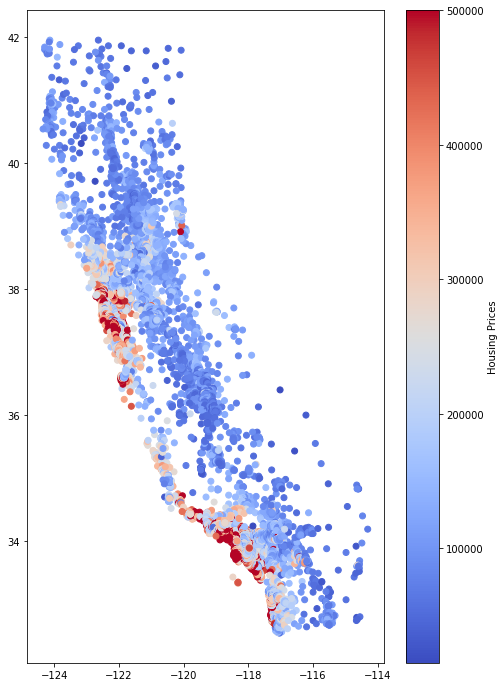

In [2]:
plt.figure(figsize = (8, 12))
s = plt.scatter(ds['longitude'], ds['latitude'], c = ds['median_house_value'], cmap = 'coolwarm')
plt.colorbar(s, label = 'Housing Prices')
plt.show()

#### Ocean Proximity Visualization

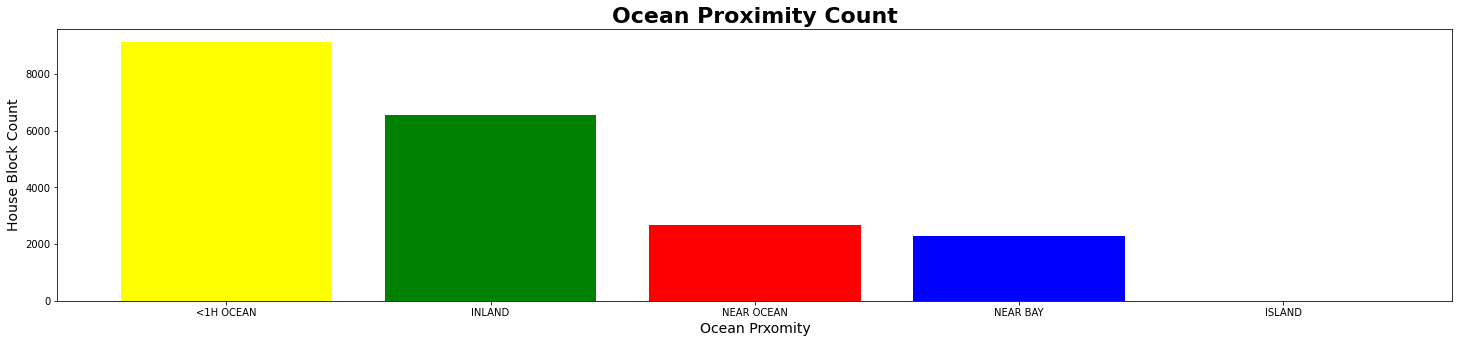

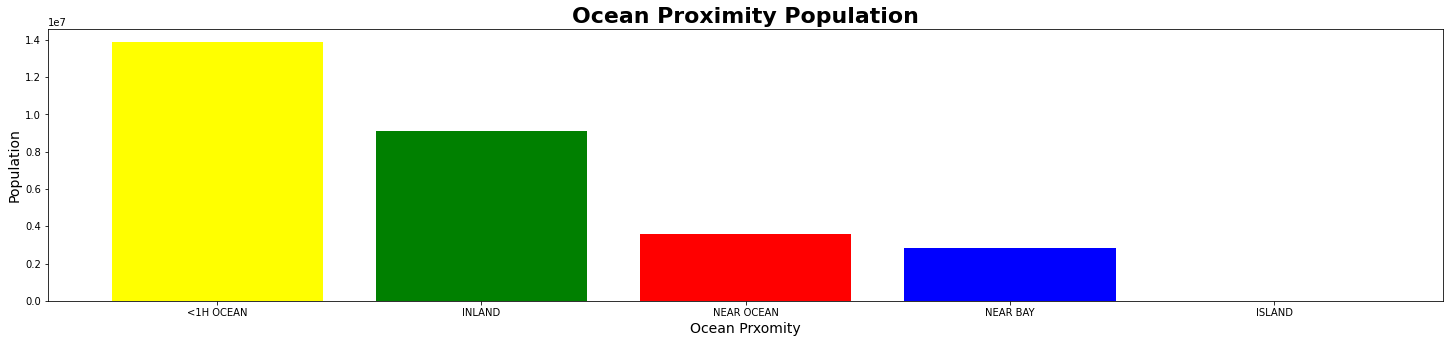

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


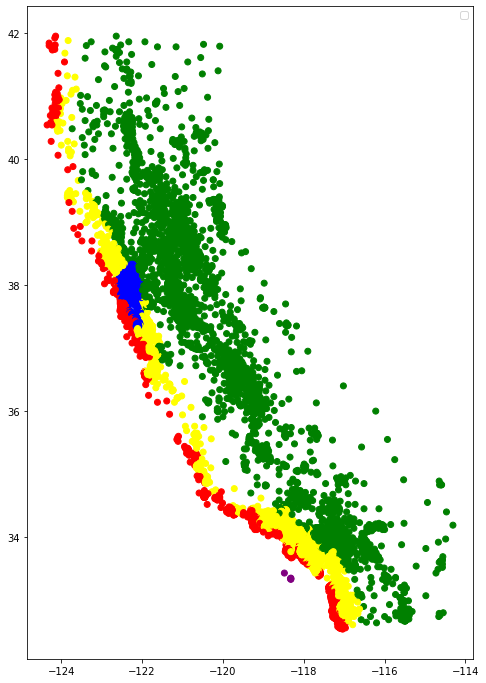

In [3]:
plt.figure(figsize = (25, 5))
colors = {'NEAR OCEAN':'red', 'INLAND':'green', 'NEAR BAY':'blue', '<1H OCEAN':'yellow', 'ISLAND':'purple'}
vc = ds["ocean_proximity"].value_counts()
plt.bar(vc.index, vc, color = ['yellow', 'green', 'red', 'blue', 'purple'])
plt.xlabel('Ocean Prxomity', fontsize = 14)
plt.ylabel('House Block Count', fontsize = 14)
plt.title('Ocean Proximity Count', fontsize = 22, fontweight = 'bold')
plt.show()

plt.figure(figsize = (25, 5))
ds_ = ds.groupby('ocean_proximity')['population'].sum().sort_values()
ds_ = ds_.iloc[::-1]
plt.bar(ds_.index, ds_, color = ['yellow', 'green', 'red', 'blue', 'purple'])
plt.xlabel('Ocean Prxomity', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.title('Ocean Proximity Population', fontsize = 22, fontweight = 'bold')
plt.show()

plt.figure(figsize = (8, 12))
plt.scatter(ds['longitude'], ds['latitude'], c = ds['ocean_proximity'].map(colors))
plt.legend()
plt.show()

## Classification

#### Random Forrest: Predict House Prices

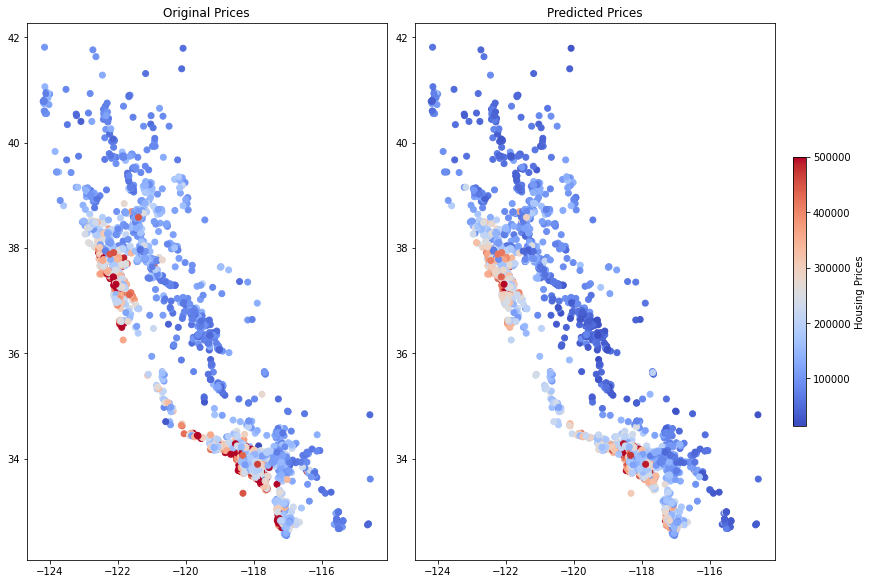

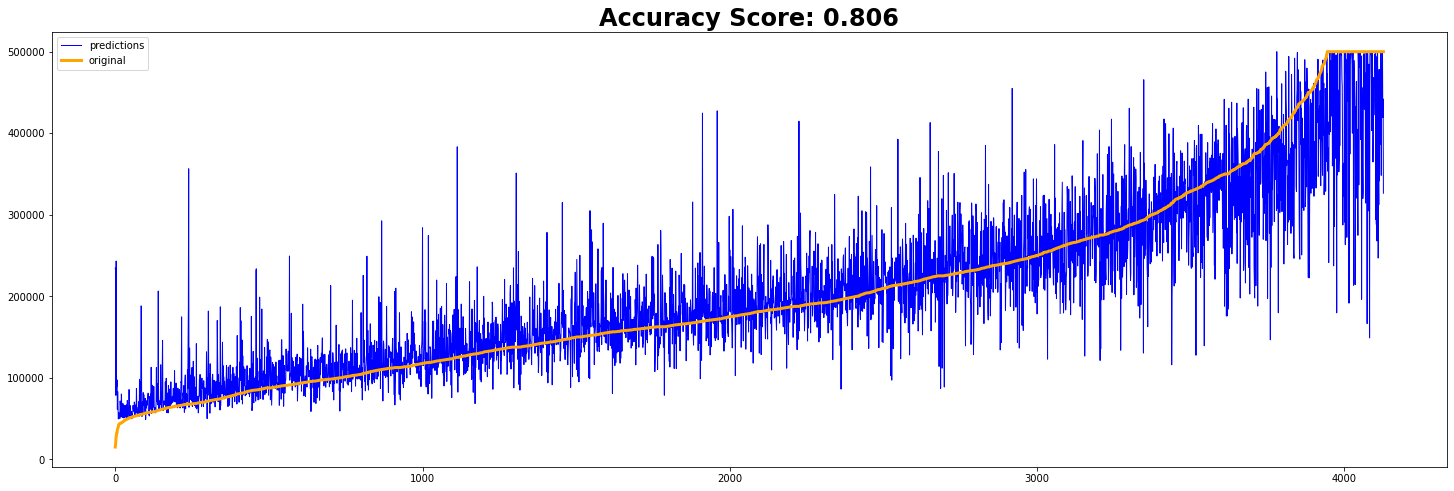

In [5]:
ds_ = ds[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num', 'median_house_value']]
X_train, X_test, y_train, y_test = train_test_split(ds_[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num']], ds_['median_house_value'], test_size = 0.2, random_state = 42)
model = RandomForestRegressor(max_depth = 20, random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize = (12, 8), constrained_layout = True)
im_1 = axes[0].scatter(X_test['longitude'], X_test['latitude'], c = y_test, cmap = 'coolwarm')
im_2 = axes[1].scatter(X_test['longitude'], X_test['latitude'], c = predictions, cmap = 'coolwarm')
axes[0].set_title('Original Prices')
axes[1].set_title('Predicted Prices')
color_bar = fig.colorbar(im_1, ax = axes[1], shrink = 0.5, label = "Housing Prices")
plt.show()

pred_test = pd.DataFrame({'test': np.array(y_test), 'predictions': list(np.array(predictions))}, columns=['test', 'predictions'])
pred_test = pred_test.sort_values(by = 'test')
ind = range(len(pred_test))
plt.figure(figsize = (25, 8))
plt.plot(ind, pred_test['predictions'], color = 'blue', linewidth = 1, label = "predictions")
plt.plot(ind, pred_test['test'], color = 'orange', linewidth = 3, label = "original")
plt.title("Accuracy Score: " + str(round(model.score(X_test,y_test), 3)), fontsize = 24, fontweight = "bold")
plt.legend()
plt.show()

#### Linear Regression

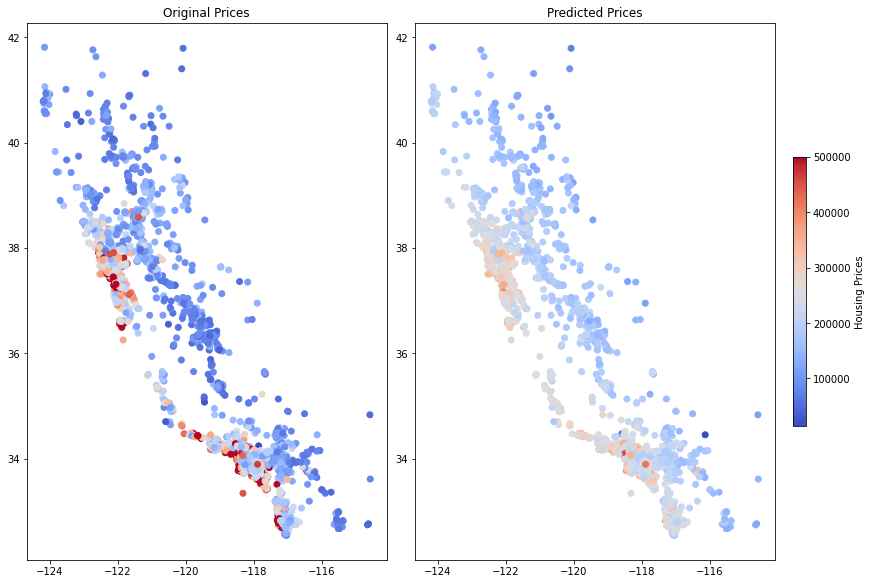

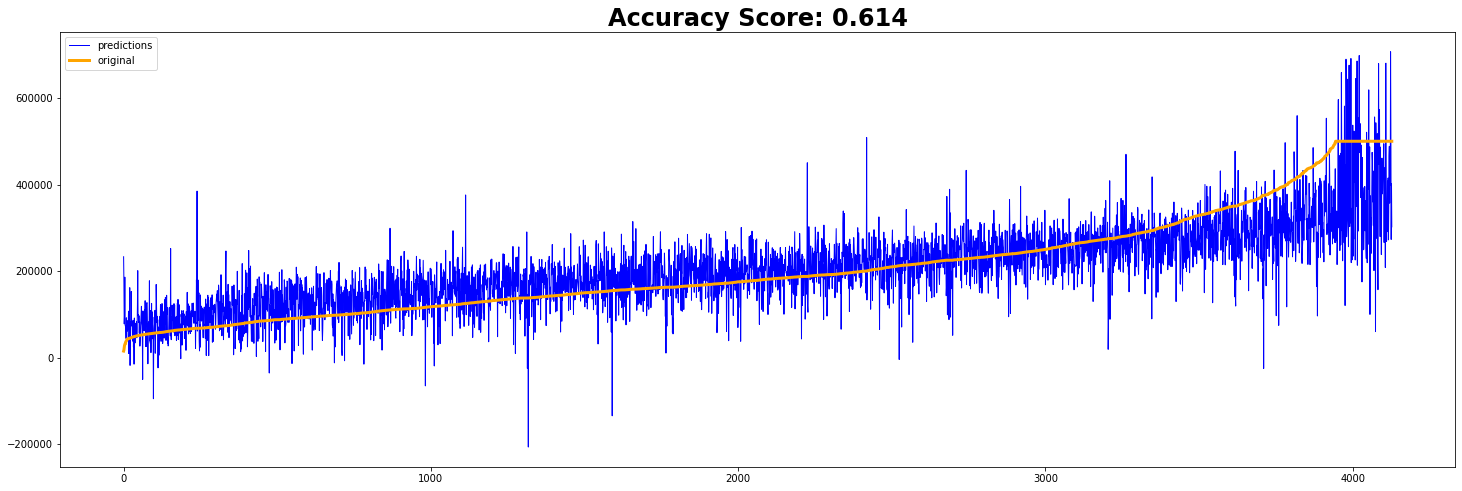

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize = (12, 8), constrained_layout = True)
im_1 = axes[0].scatter(X_test['longitude'], X_test['latitude'], c = y_test, cmap = 'coolwarm')
im_2 = axes[1].scatter(X_test['longitude'], X_test['latitude'], c = predictions, cmap = 'coolwarm')
axes[0].set_title('Original Prices')
axes[1].set_title('Predicted Prices')
color_bar = fig.colorbar(im_1, ax = axes[1], shrink = 0.5, label = "Housing Prices")
plt.show()

pred_test = pd.DataFrame({'test': np.array(y_test), 'predictions': list(np.array(predictions))}, columns=['test', 'predictions'])
pred_test = pred_test.sort_values(by = 'test')
ind = range(len(pred_test))
plt.figure(figsize = (25, 8))
plt.plot(ind, pred_test['predictions'], color = 'blue', linewidth = 1, label = "predictions")
plt.plot(ind, pred_test['test'], color = 'orange', linewidth = 3, label = "original")
plt.title("Accuracy Score: " + str(round(model.score(X_test,y_test), 3)), fontsize = 24, fontweight = "bold")
plt.legend()
plt.show()

#### Ridge Regularization Regression

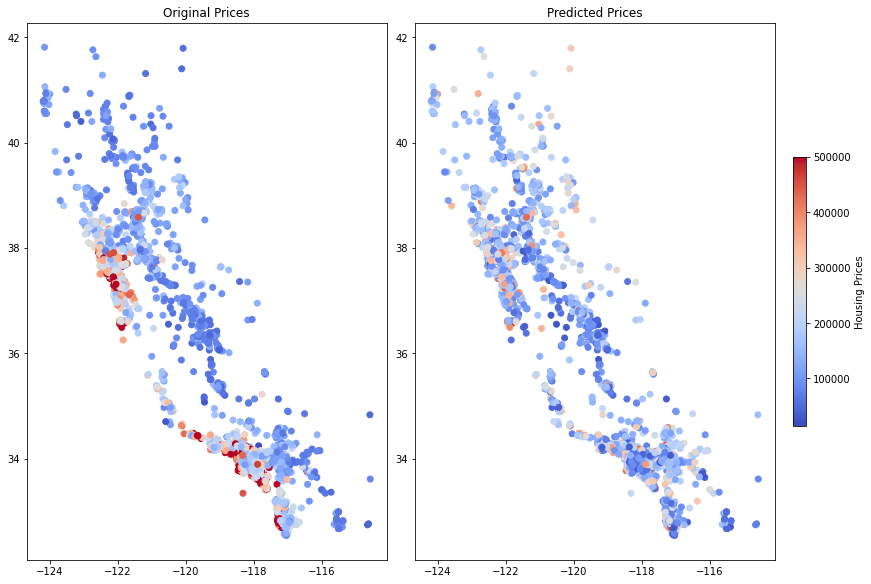

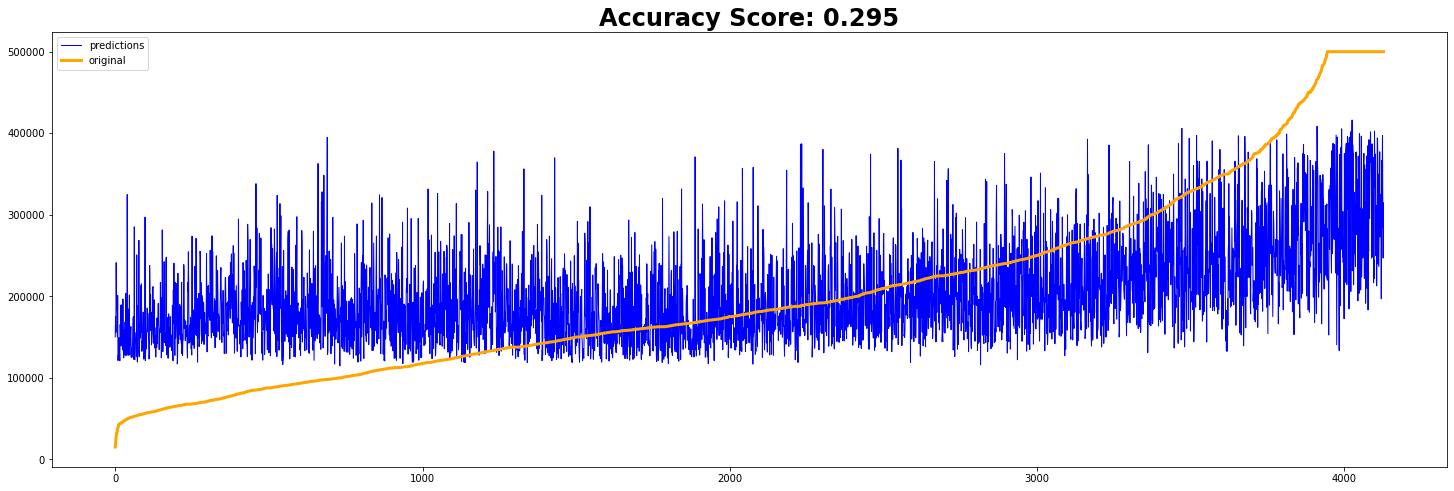

In [8]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = int((math.sqrt(len(X_train)) / 2)))
model.fit(X_train, y_train)
predictions = model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize = (12, 8), constrained_layout = True)
im_1 = axes[0].scatter(X_test['longitude'], X_test['latitude'], c = y_test, cmap = 'coolwarm')
im_2 = axes[1].scatter(X_test['longitude'], X_test['latitude'], c = predictions, cmap = 'coolwarm')
axes[0].set_title('Original Prices')
axes[1].set_title('Predicted Prices')
color_bar = fig.colorbar(im_1, ax = axes[1], shrink = 0.5, label = "Housing Prices")
plt.show()

pred_test = pd.DataFrame({'test': np.array(y_test), 'predictions': list(np.array(predictions))}, columns=['test', 'predictions'])
pred_test = pred_test.sort_values(by = 'test')
ind = range(len(pred_test))
plt.figure(figsize = (25, 8))
plt.plot(ind, pred_test['predictions'], color = 'blue', linewidth = 1, label = "predictions")
plt.plot(ind, pred_test['test'], color = 'orange', linewidth = 3, label = "original")
plt.title("Accuracy Score: " + str(round(model.score(X_test,y_test), 3)), fontsize = 24, fontweight = "bold")
plt.legend()
plt.show()

#### Conclusion:
Best regression model is Random Forrest
- Random Forrest: 80.6%
- Linear Regression: 61.4%
- KNN Regressor: 29.5%